<a href="https://colab.research.google.com/github/Himagination/TensorFlow_Developer/blob/main/01_NN_Regression_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Typical Architecture of a Neural Network Regression Model

- Input Layer shape: Same shape as number of features
- Hidden layer(s): Problem specific, min=1, max=unlimited
- Neurons per hidden layer: Problem specific, generally 10 - 100
- Output Layer shape: Same shape as desired prediction shape
- Hidden Activation: Usually ReLU
- Output Activation: None, ReLU, logistic/tanh
- Loss Function: MSE, MAE, Huber Loss
- Optimizer: SGD, Adam

In [20]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.7.0


### Creating data to view and fit

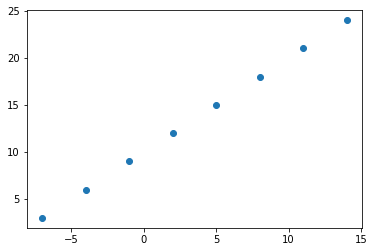

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize the data
plt.scatter(X, y);

In [22]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

**This is the relationship which we want to establish between our input and output variables using Neural Network.**

### Input and output shape

In [23]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [24]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [25]:
X[0], y[0]

(-7.0, 3.0)

**Basically we want to create a model which takes -7 as input and predict 3 as output.**

In [26]:
# Turn NumPy array into Tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow
1. **Creating a model**- Define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**- Define the loss function(function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics(what we can use to interpret the performance of our model).
3. Fitting a model - Letting the model try to find patterns between X & y(features and labels).

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 276ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [28]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

**As per mae value, our model is 10 value far from actual value.**

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (called neurons) within each of the hidden layers, change the activation of each layer.
2. **Compiling a model** - Here we might change the optimization function or the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** or on more data.


In [29]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
                             ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 276ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 8

**Just by altering the number of epochs, our MAE has decreased from 10 to 6.88**

In [30]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

**Adding one more layer and checking the change.**

In [31]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1), 
                             tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 334ms/step - loss: 11.0647 - mae: 11.0647
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8740 - mae: 10.8740
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6700 - mae: 10.6700
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4517 - mae: 10.4517
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2178 - mae: 10.2178
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.9674 - mae: 9.9674
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6992 - mae: 9.6992
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.4118 - mae: 9.4118
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 9.1039 - mae: 9.1039
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7739 - mae: 8.7739
Epoch 11/100
1/1 [==============================] - 0s 10ms/step

**The MAE loss has decreased further by adding one malyer.**

In [32]:
model.predict([17.0])

array([[30.64832]], dtype=float32)

In [33]:
# Let's make another improvement

# 1. Create the model(this time with an extra hidden layer with 100 neurons)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation='relu'), 
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 367ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.9052 - mae: 11.9052
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0712 - mae: 11.0712
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2556 - mae: 10.2556
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6071 - mae: 9.6071
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9779 - mae: 8.9779
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3324 - mae: 8.3324
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 7.6675 - mae: 7.6675
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9773 - mae: 6.9773
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.2578 - mae: 6.2578
Epoch 11/100
1/1 [==============================] - 0s 7ms/step -

In [34]:
model.predict([17.0])

array([[26.43606]], dtype=float32)

### Evaluating a model

In practice, a typical workflow you'll go through when building neural network.

```
Build a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it.....```

When it comes to evaluation, 3 words you should memorize:
> "Visualize, Visualize, Visualize"

Its a good idea to visualize-
- The Data: What data are we working with? What does it look like?
- The model itself: What does our model look like?
- The training of a model: How does a model perform while it learns?
- The predictions of the model: How do the predictions of the model line up against the ground truth?

In [35]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [36]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

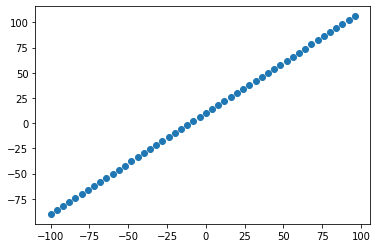

In [37]:
# Visualize the data

plt.scatter(X, y)

### The three sets:

- **Training set**: The model learns from this data, which is typically 70-80% of the total data.
- **Validation Set**: The model gets tuned on this data, which is typically 10-15% of the data available.
- **Test set**: The model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.


In [38]:
# Check the length of how many samples we have
len(X)

50

In [39]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing our data

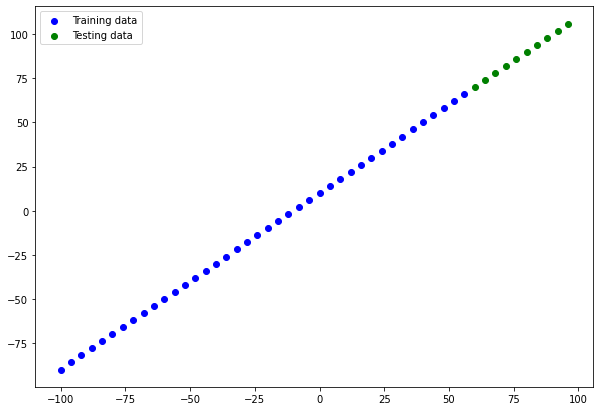

In [40]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

In [41]:
# Let's have a look at how to bulid neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=['mae'])

# 3. Fit the model

model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 47.1280 - mae: 47.1280
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 15.7179 - mae: 15.7179
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 15.0809 - mae: 15.0809
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 8.1832 - mae: 8.1832
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.6664 - mae: 10.6664
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.8707 - mae: 9.8707
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.9399 - mae: 8.9399
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0851 - mae: 9.0851
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 19.6577 - mae: 19.6577
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.6254 - mae: 10.6254
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - 

In [42]:
# Visualize the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Let's create a model which builds automatically by defining the input_shape argument

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape=[1], activation='relu', name="input_layer"),  
                             tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              metrics=['mae'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - Total number of parameters in the model.
* Trainable parameters - These are the parameters(patterns) the model can update as it trains.
* Non-trainable params - These parameters aren't updated during training. This is typically when you bring in already learned patterns or parameters from other models during **Transfer Learning**. 

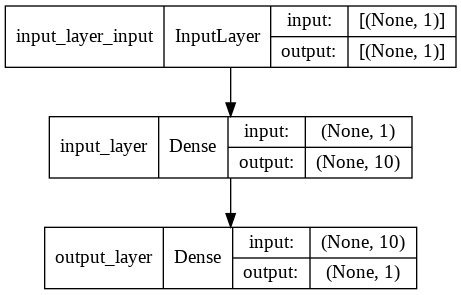

In [44]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [45]:
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 42.9790 - mae: 42.9790
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 39.9109 - mae: 39.9109
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 36.9743 - mae: 36.9743
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 33.9349 - mae: 33.9349
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 30.9411 - mae: 30.9411
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 27.9144 - mae: 27.9144
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 24.7755 - mae: 24.7755
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 21.5729 - mae: 21.5729
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.3553 - mae: 19.3553
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 17.1586 - mae: 17.1586
Epoch 11/100
2/2 [==============================] - 0s 5ms/

### Visualizing model's prediction

To visualize predictions, its a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred`.

In [46]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 72.21321 ],
       [ 76.72522 ],
       [ 81.23722 ],
       [ 85.74924 ],
       [ 90.26124 ],
       [ 94.77325 ],
       [ 99.285255],
       [103.797264],
       [108.30927 ],
       [112.82128 ]], dtype=float32)

In [47]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  plt.scatter(test_data, test_labels, c='g', label="Testing data")
  plt.scatter(test_data, predictions, c='r', label="Predictions")
  plt.legend();

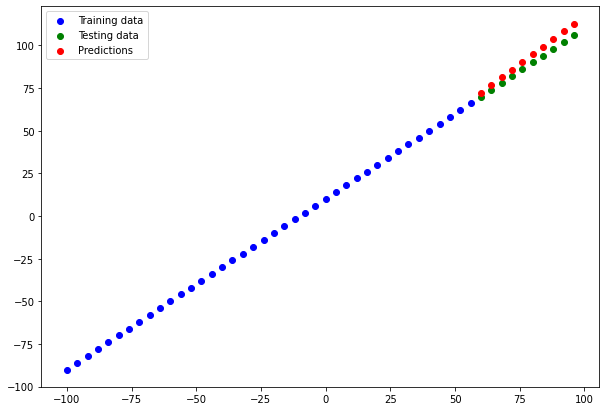

In [48]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on regression, two of the main metrics:
* MAE - Mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - Mean square error, "square the average errors".

In [49]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 103ms/step - loss: 4.5172 - mae: 4.5172


[4.517242431640625, 4.517242431640625]

In [50]:
# Calculate MAE
tf.keras.losses.mae(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=4.517245>

In [51]:
# Calculate MSE
tf.keras.losses.mse(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=22.568254>

In [52]:
h = tf.keras.losses.Huber()
h(y_test, y_pred).numpy()

14.131137

### Running experiments to improve our model

1. Get more data - Get more examples for your model to train on(more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger(using more complex model) - This might come in form of more layers or more hidden units in each layer.
3. Train for longer - Give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build model_1**

In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['mae'])
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - l

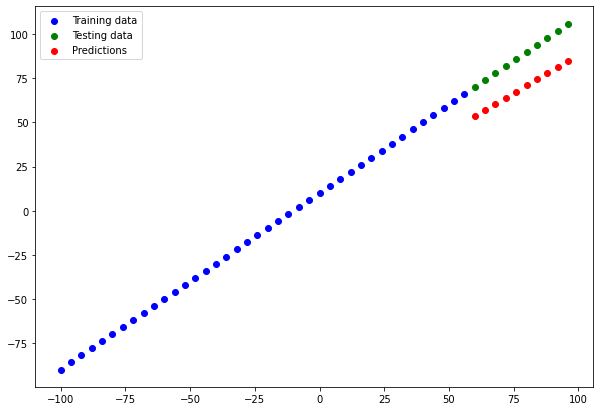

In [54]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [55]:
# Calculate model_1 evaluation metrics
mae_1 = tf.keras.losses.mae(y_test, tf.squeeze(y_preds_1))
mse_1 = tf.keras.losses.mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [56]:
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10), 
                               tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 73.0019 - mae: 73.0019
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 17.5325 - mae: 17.5325
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 20.4862 - mae: 20.4862
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 13.1871 - mae: 13.1871
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.5492 - mae: 14.5492
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.6087 - mae: 11.6087
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.6668 - mae: 12.6668
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0468 - mae: 11.0468
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 39.7317 - mae: 39.7317
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.2189 - mae: 27.2189
Epoch 11/100
2/2 [==============================] - 0s 8ms/

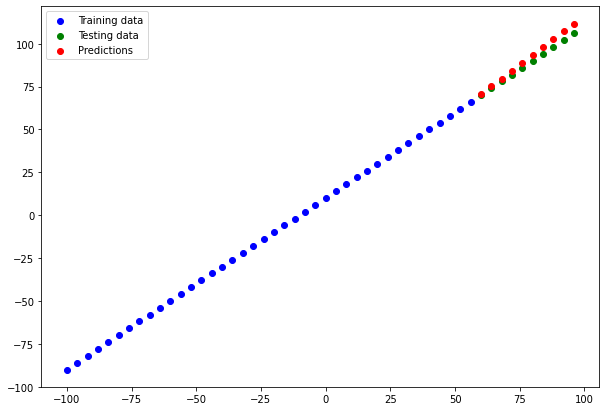

In [57]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [58]:
# Evaluations metrics
mae_2 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_2))
mse_2 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1109948>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.497052>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [59]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10), 
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 6ms/

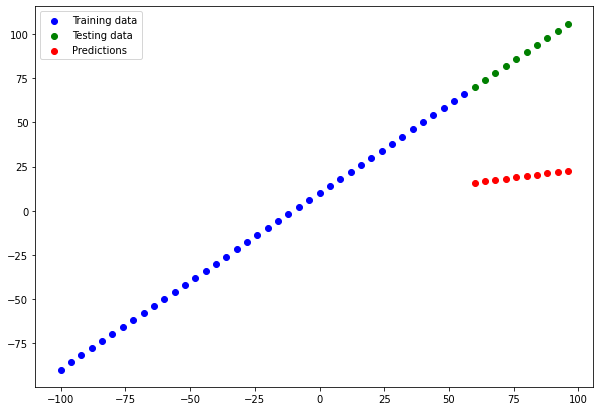

In [60]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [61]:
# Evalation metrics
mae_3 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_3))
mse_3 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

### Comparing the results of our experiment

In [62]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()], 
                 ["model_2", mae_2.numpy(), mse_2.numpy()], 
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.110995,12.497052
2,model_3,68.713615,4808.027344


# A Larger Example

In [63]:
# Import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# Read insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-with-R-Third-Edition/master/Chapter06/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [65]:
# Let's try one-hot encode on our dataframes
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


In [66]:
# Create X(Features), y(labels)

X = insurance_one_hot.drop('expenses', axis=1)
y = insurance_one_hot['expenses']
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0


In [67]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [68]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [69]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10), 
                                       tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.SGD(), 
                        metrics=['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8637.1279 - mae: 8637.1279
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.6802 - mae: 7886.6802
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1572 - mae: 7558.1572
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7805.3096 - mae: 7805.3096
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7671.1680 - mae: 7671.1680
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7601.0796 - mae: 7601.0796
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7533.0327 - mae: 7533.0327
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7694.2349 - mae: 7694.2349
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7621.5293 - mae: 7621.5293
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7677.3970 - mae: 7677.3970

In [70]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7001.3320 - mae: 7001.3320


[7001.33203125, 7001.33203125]

Right now it looks like our model isn't performing  well. Lets try to improve the model.

To(try) improve our model, we will run 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer

In [71]:
# Set random seed
tf.random.set_seed(42)
# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100), 
                                         tf.keras.layers.Dense(10), 
                                         tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae, 
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 11434.4102 - mae: 11434.4102
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7504.8511 - mae: 7504.8511
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7289.5371 - mae: 7289.5371
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7064.4883 - mae: 7064.4883
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6825.6621 - mae: 6825.6621
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6569.6680 - mae: 6569.6680
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6442.9468 - mae: 6442.9468
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6254.9512 - mae: 6254.9512
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6126.9072 - mae: 6126.9072
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 5935.1714 - mae: 5935.17

In [72]:
# Evaluation metrics
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.9192 - mae: 3161.9192


[3161.919189453125, 3161.919189453125]

In [73]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100), 
                                         tf.keras.layers.Dense(10), 
                                         tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae, 
                          optimizer=tf.keras.optimizers.Adam(), 
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1582 - mae: 13273.1582
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4268 - mae: 13104.4268
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5264 - mae: 12749.5264
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7197 - mae: 12055.7197
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.7715 - mae: 10905.7715
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.6592 - mae: 9457.6592
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.5933 - mae: 8147.5933
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8027 - mae: 7528.8027
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.0996 - mae: 7429.0996
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.1787 - mae:

In [74]:
# Evaluation metrics
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3489.3298 - mae: 3489.3298


[3489.329833984375, 3489.329833984375]

Text(0.5, 0, 'epochs')

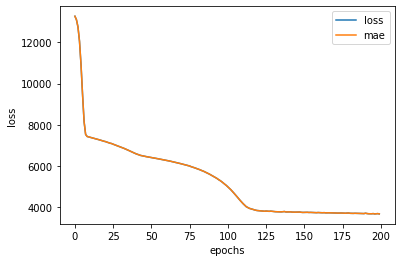

In [75]:
# Plot history(also known as loss curve or a training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data(Normalization and Standardization)

In terms of scaling values, Neural Networks tend to prefer normalizations.
If you are not sure on which to use(Normalization(MinMaxScaler) or Standardization(StandardScaler)), you could try both and see which performs better.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-with-R-Third-Edition/master/Chapter06/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [77]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), 
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

X = insurance.drop('expenses', axis=1)
y = insurance['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with Normalization and OneHotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [78]:
# Visualize the data now
X_train_normal[0]

array([0.60869565, 0.10781671, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [79]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

### Build a Neural Network to fit on our normalized data.

In [80]:
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100), 
                                         tf.keras.layers.Dense(10), 
                                         tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae, 
                          optimizer=tf.keras.optimizers.Adam(), 
                          metrics=['mae'])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4805 - mae: 13333.4805
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0244 - mae: 13312.0244
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7979 - mae: 13267.7979
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5908 - mae: 13189.5908
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4668 - mae: 13066.4668
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.2236 - mae: 12888.2236
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6924 - mae: 12644.6924
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.6074 - mae: 12325.6074
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11926.04

In [81]:
# Evaluation metrics
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3439.6055 - mae: 3439.6055


[3439.60546875, 3439.60546875]